In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [4]:
log = lammps_logfile.File("minimize.log")

timestep = 0.5 # fs
time_0 = log.get("Step", run_num=0)*timestep/1000 # ps
TotEng_0 = log.get("TotEng", run_num=0)/1000 # MJ/mol
temp_0 = log.get("Temp", run_num=0) # K

timestep = 1.0 # fs
time_1 = log.get("Step", run_num=1)*timestep/1000-2 # ps
TotEng_1 = log.get("TotEng", run_num=1)/1000 # MJ/mol
temp_1 = log.get("Temp", run_num=1) # K

time_2 = log.get("Step", run_num=2)*timestep/1000-2 # ps
TotEng_2 = log.get("TotEng", run_num=2)/1000 # MJ/mol
temp_2 = log.get("Temp", run_num=2) # K

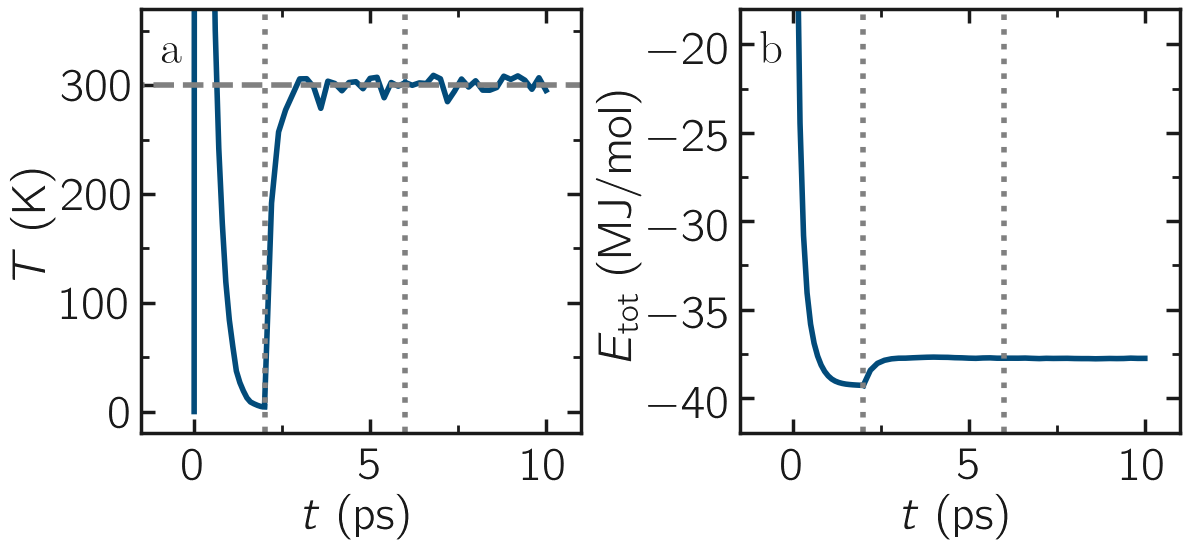

In [8]:
filename = "NANOSHEAR-minimization"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5.6), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = time_0, y = temp_0, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time_1, y = temp_1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time_2, y = temp_2, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
x = np.linspace(-2, 15)
myplt.add_plot(x = x, y = x*0+300, type = "plot", linewidth_data = 1.5,
               marker = "--", data_color = color4, markersize = 12)
x = np.linspace(-1000, 1000)
myplt.add_plot(x = x*0+2, y = x, type = "plot", linewidth_data = 1.5,
               marker = ":", data_color = color4, markersize = 12)
myplt.add_plot(x = x*0+6, y = x, type = "plot", linewidth_data = 1.5,
               marker = ":", data_color = color4, markersize = 12)
myplt.complete_panel(ylabel = r'$T ~ \mathrm{(K)}$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 11, 5), y_ticks=np.arange(0, 360, 100),
                    x_boundaries=(-1.5, 11), y_boundaries=(-20, 370))

# Panel a
myplt.add_panel()
myplt.add_plot(x = time_0, y = TotEng_0, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time_1, y = TotEng_1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time_2, y = TotEng_2, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
x = np.linspace(-1000, 1000)
myplt.add_plot(x = x*0+2, y = x, type = "plot", linewidth_data = 1.5,
               marker = ":", data_color = color4, markersize = 12)
myplt.add_plot(x = x*0+6, y = x, type = "plot", linewidth_data = 1.5,
               marker = ":", data_color = color4, markersize = 12)
myplt.complete_panel(ylabel = r'$E_\mathrm{tot} ~ \mathrm{(MJ/mol)}$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 11, 5), y_ticks=np.arange(-40, -19, 5),
                    x_boundaries=(-1.5, 11), y_boundaries=(-42, -18))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)